In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import os

Using TensorFlow backend.


In [2]:
batch_size = 64
num_classes = 10
epochs = 100
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_trained_model_adam.h5'

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
model = Sequential()

# Layer 1
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same',
                 input_shape=x_train.shape[1:]))
# Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Layer 3
model.add(Conv2D(128, (3, 3), padding='same'))
# Layer 4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Layer 5
model.add(Conv2D(256, (3, 3), padding='same'))
# Layer 6
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Layer 7
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same'))
# Layer 8
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Layer 9
model.add(Flatten())
# Layer 10
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(rate=0.25))
model.add(BatchNormalization())
# Layer 11
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(rate=0.25))
model.add(BatchNormalization())
# Layer 12
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.25))
model.add(BatchNormalization())
# Layer 13
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(rate=0.25))
model.add(BatchNormalization())
# Layer 14
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [5]:
# opt = keras.optimizers.Adam(learning_rate=0.001)
# opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('Not using data augmentation.')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 210us/step - loss: 1.8892 - accuracy: 0.3684 - val_loss: 1.7397 - val_accuracy: 0.4381
Epoch 2/100
50000/50000 [==============================] - 8s 161us/step - loss: 1.3309 - accuracy: 0.5438 - val_loss: 1.5064 - val_accuracy: 0.5110
Epoch 3/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.0530 - accuracy: 0.6385 - val_loss: 0.9704 - val_accuracy: 0.6704
Epoch 4/100
50000/50000 [==============================] - 8s 160us/step - loss: 0.8673 - accuracy: 0.7044 - val_loss: 0.8832 - val_accuracy: 0.6962
Epoch 5/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.7298 - accuracy: 0.7522 - val_loss: 0.8859 - val_accuracy: 0.7012
Epoch 6/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.6157 - accuracy: 0.7911 - val_loss: 0.8035 - val_accuracy: 0.7226
Epoch 7/100
50000/50000 [=

50000/50000 [==============================] - 8s 161us/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 1.2838 - val_accuracy: 0.7939
Epoch 56/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.0119 - accuracy: 0.9958 - val_loss: 1.2769 - val_accuracy: 0.7893
Epoch 57/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 1.2429 - val_accuracy: 0.7996
Epoch 58/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 1.3343 - val_accuracy: 0.7856
Epoch 59/100
50000/50000 [==============================] - 8s 162us/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 1.2872 - val_accuracy: 0.7936
Epoch 60/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 1.2849 - val_accuracy: 0.7973
Epoch 61/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.0085 - accuracy: 0.9974 - val

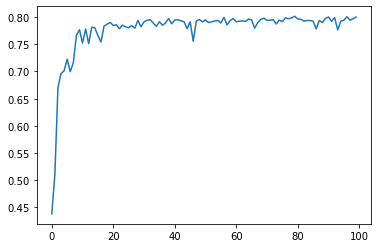

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(history.history['val_accuracy'])
plt.show()

In [7]:
y_pred_class = model.predict(x_test)

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_class, axis=1))
print(cm)

[[827  10  37  22  11   5   2   7  52  27]
 [ 13 906   3   4   3   2   6   2  16  45]
 [ 51   2 705  49  64  51  44  21  12   1]
 [ 18   4  48 620  50 153  52  24  21  10]
 [  9   3  56  54 765  31  36  34   8   4]
 [ 10   2  22 131  34 724  27  40   8   2]
 [  8   0  24  61  16  12 860   7   8   4]
 [  7   0  17  26  50  49  11 816   4  20]
 [ 31  17   8   8   5   3   3   4 905  16]
 [ 20  51   4  12   5   3   9   5  17 874]]


In [9]:
import csv

def output_log(history):
    train_costs = history['loss']
    train_accs = history['accuracy']
    test_costs = history['val_loss']
    test_accs = history['val_accuracy']
    with open('CNN.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        for epoch in range(len(train_costs)):
            writer.writerow([epoch + 1, train_costs[epoch], train_accs[epoch], test_costs[epoch], test_accs[epoch]])

output_log(history.history)